In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Uploading data 
train = pd.read_csv(r"C:\Users\susha\Downloads\train_ctrUa4K.csv")
test = pd.read_csv(r"C:\Users\susha\Downloads\test_lAUu6dG.csv")

In [8]:
train_original=train.copy() 
test_original=test.copy()

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [12]:
# The target is loan status which was not included in test data

In [13]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
train.shape,test.shape

((614, 13), (367, 12))

In [15]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Exploratory data analysis

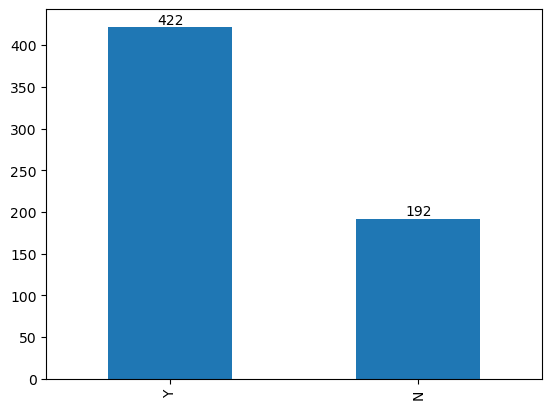

In [16]:
ax = train["Loan_Status"].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)

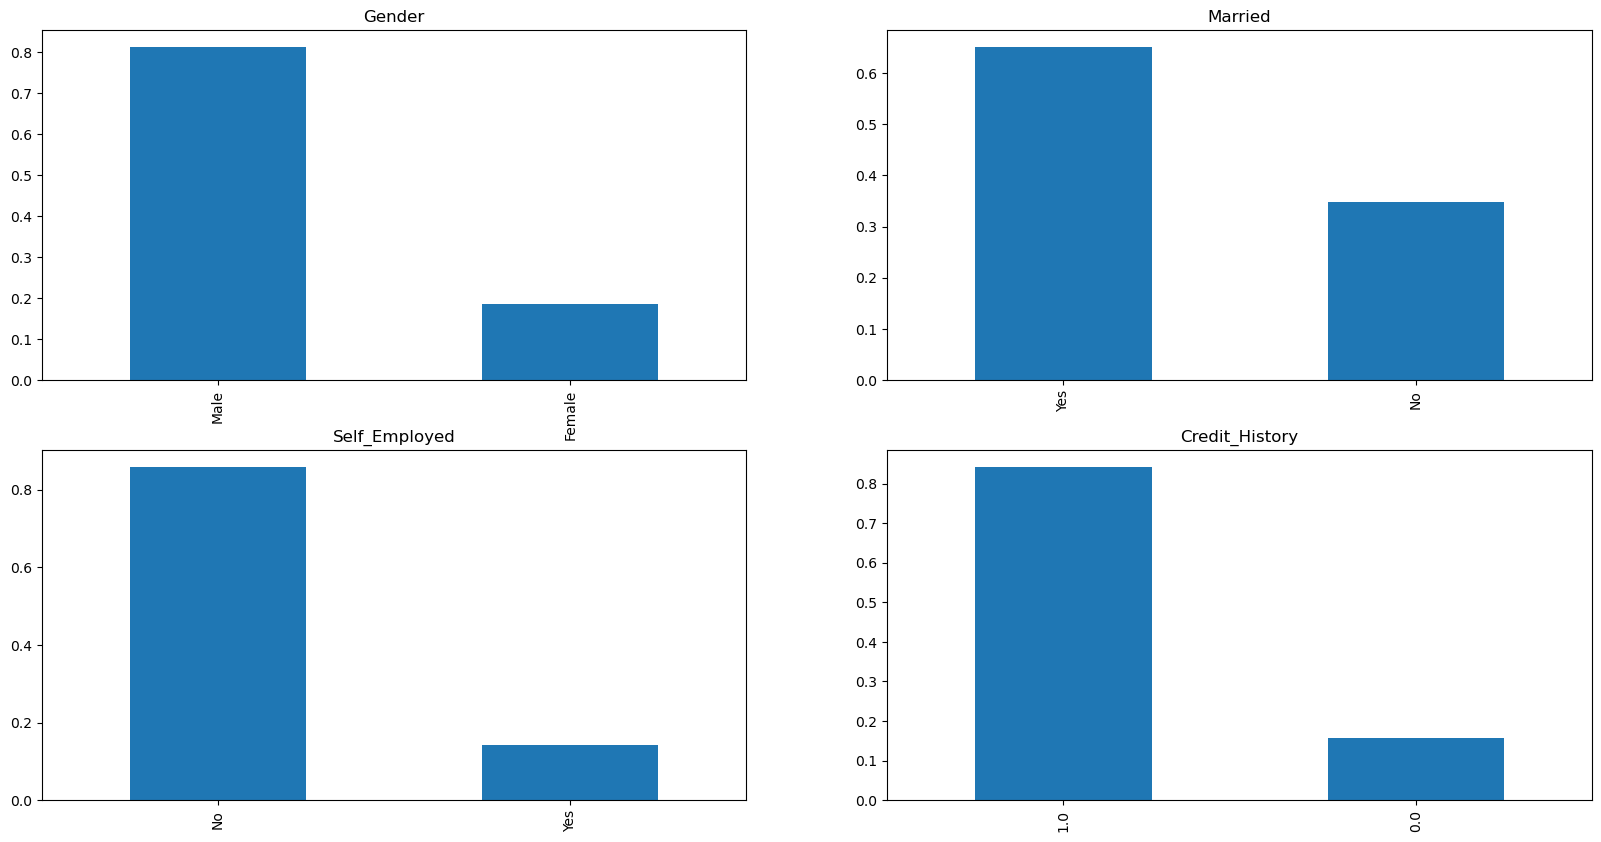

In [17]:
plt.figure(1) 
plt.subplot(221) 
aa = train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') , plt.subplot(222) 
ab = train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') , plt.subplot(223) 
ac = train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed'), plt.subplot(224) 
ad = train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') ,
plt.show()

#It can be inferred from the above bar plots that:

80% of applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
About 15% of applicants in the dataset are self-employed.
About 85% of applicants have repaid their debts.

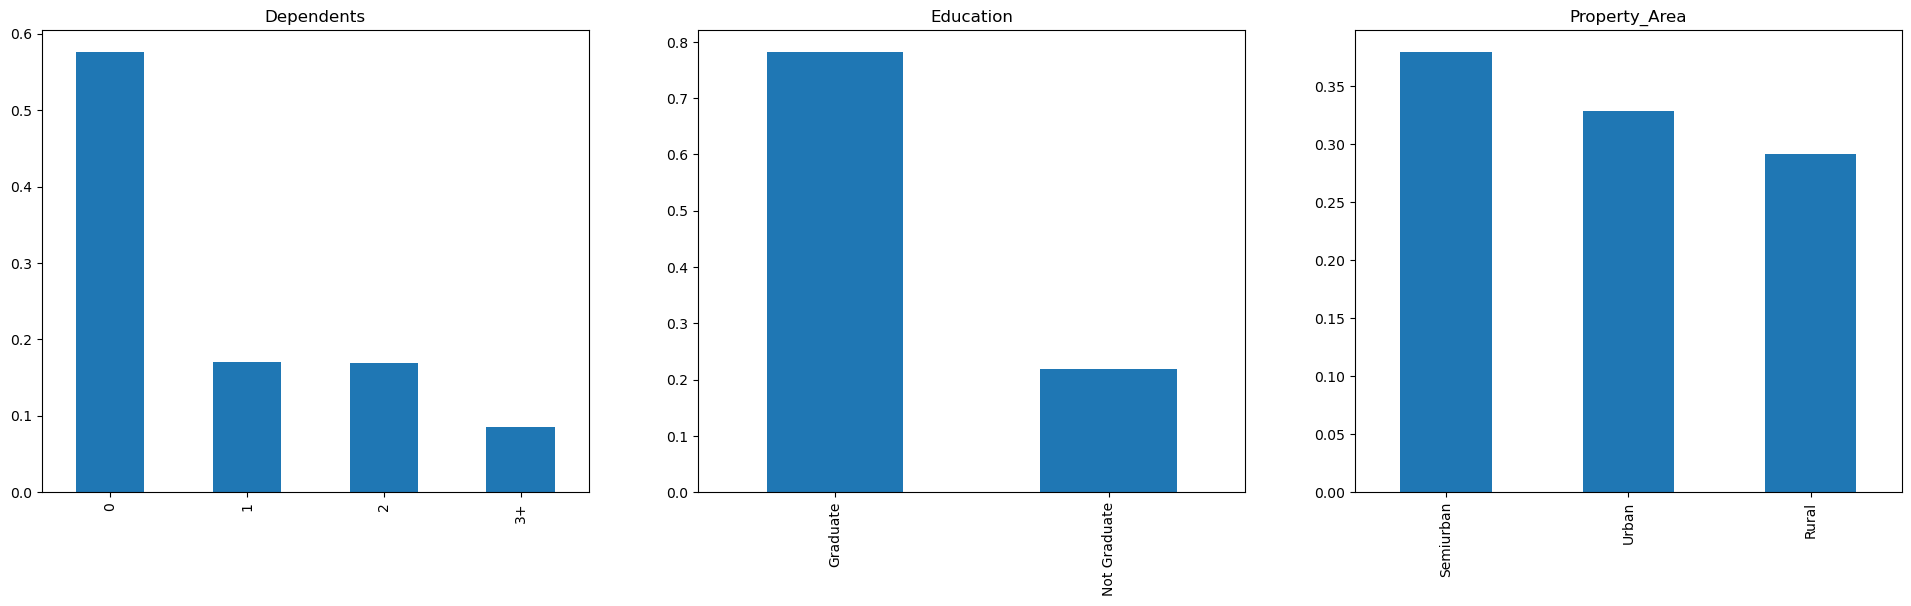

In [18]:
# Now plot independent Variable
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Following inferences can be made from the above bar plots:

Most of the applicants don’t have dependents.
About 80% of the applicants are graduates.
Most of the applicants are from semi-urban areas.

C:\Users\susha\AppData\Local\Temp\ipykernel_13400\4205472628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

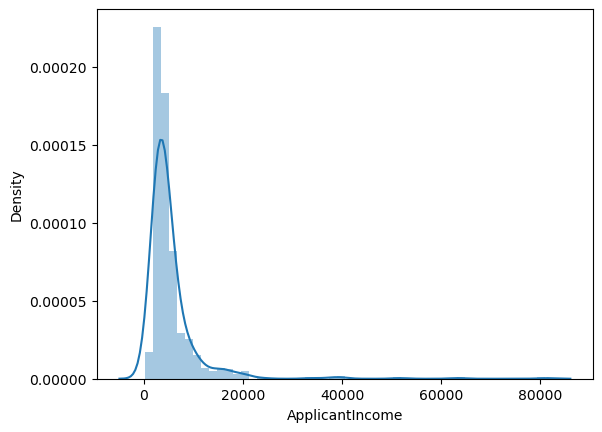

In [19]:
sns.distplot(train['ApplicantIncome'])

C:\Users\susha\AppData\Local\Temp\ipykernel_13400\242046332.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

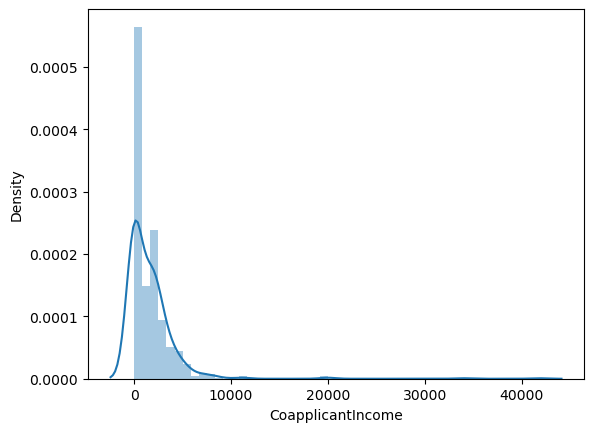

In [20]:
sns.distplot(train['CoapplicantIncome'])

C:\Users\susha\AppData\Local\Temp\ipykernel_13400\3189395263.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

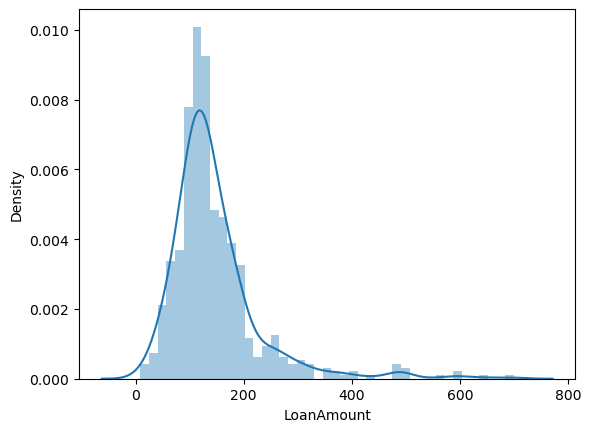

In [21]:
sns.distplot(train['LoanAmount'])

C:\Users\susha\AppData\Local\Temp\ipykernel_13400\3940291310.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = train.corr()


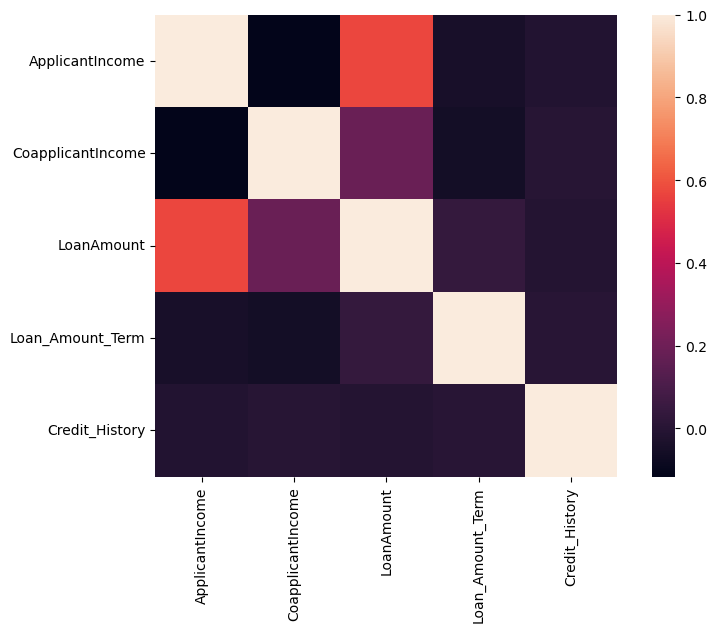

In [22]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix,square=True);

# Missing value handling

In [23]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())

In [25]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [26]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [28]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())


In [29]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

# Now outlier detection and elimination

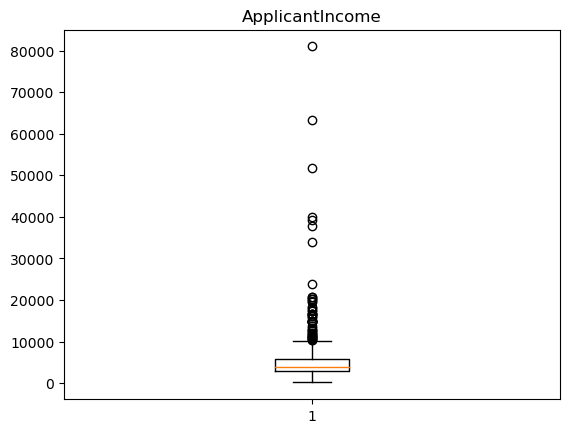

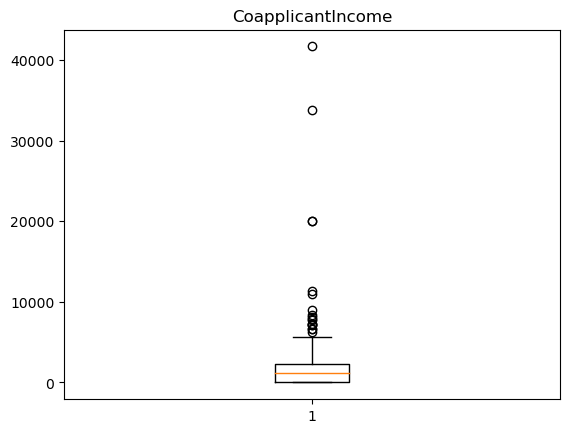

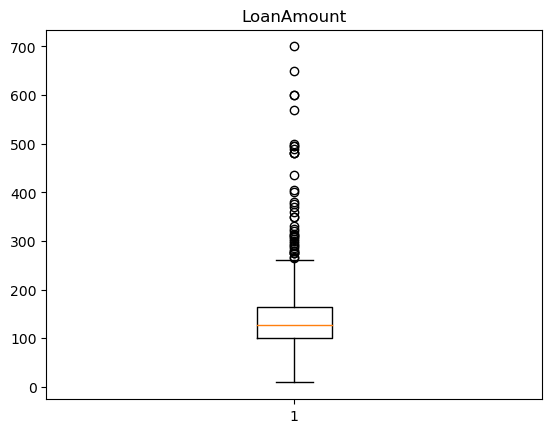

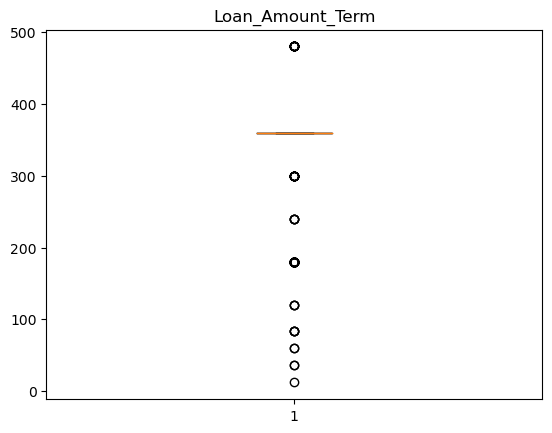

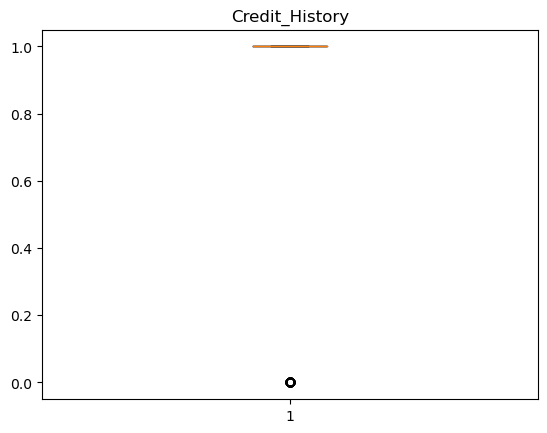

In [30]:
num_cols=['ApplicantIncome','CoapplicantIncome', "LoanAmount",'Loan_Amount_Term','Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(train[i])
    plt.title(i)

In [31]:
Q1 = train['ApplicantIncome'].quantile(0.25)
Q3 = train['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
train['ApplicantIncome']=np.where(train['ApplicantIncome']>upper_whisker,upper_whisker,np.where(train['ApplicantIncome']<lower_whisker,lower_whisker,train['ApplicantIncome']))

In [32]:
Q1 = train['CoapplicantIncome'].quantile(0.25)
Q3 = train['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
train['CoapplicantIncome']=np.where(train['CoapplicantIncome']>upper_whisker,upper_whisker,np.where(train['CoapplicantIncome']<lower_whisker,lower_whisker,train['CoapplicantIncome']))

In [33]:
Q1 = train["LoanAmount"].quantile(0.25)
Q3 = train["LoanAmount"].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
train['LoanAmount']=np.where(train['LoanAmount']>upper_whisker,upper_whisker,np.where(train['LoanAmount']<lower_whisker,lower_whisker,train['LoanAmount']))

In [34]:
Q1 = train['Loan_Amount_Term'].quantile(0.25)
Q3 = train['Loan_Amount_Term'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
train['Loan_Amount_Term']=np.where(train['Loan_Amount_Term']>upper_whisker,upper_whisker,np.where(train['Loan_Amount_Term']<lower_whisker,lower_whisker,train['Loan_Amount_Term']))

In [35]:
Q1 = train['Credit_History'].quantile(0.25)
Q3 = train['Credit_History'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
train['Credit_History']=np.where(train['Credit_History']>upper_whisker,upper_whisker,np.where(train['Credit_History']<lower_whisker,lower_whisker,train['Credit_History']))

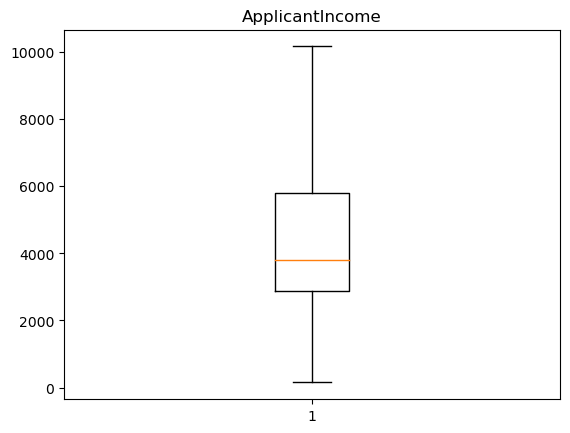

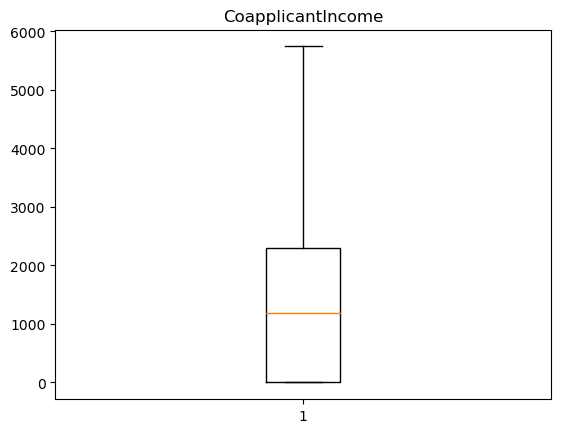

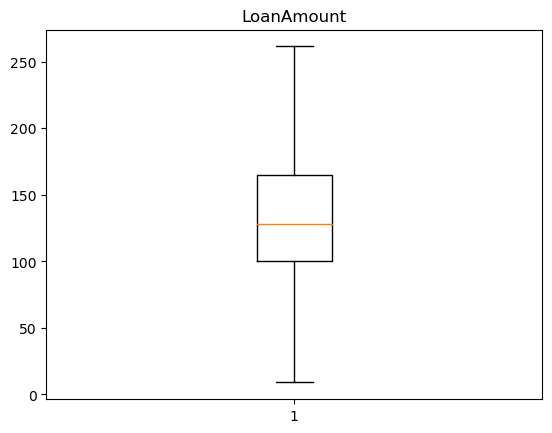

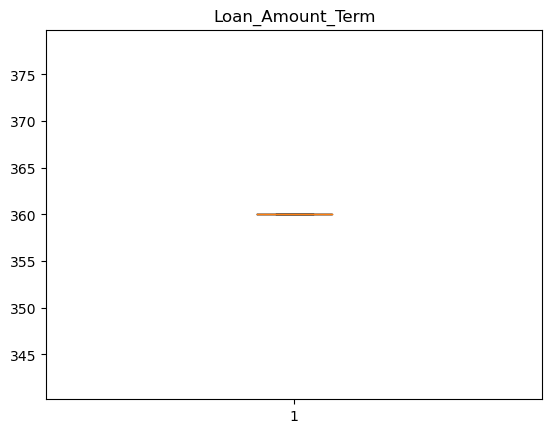

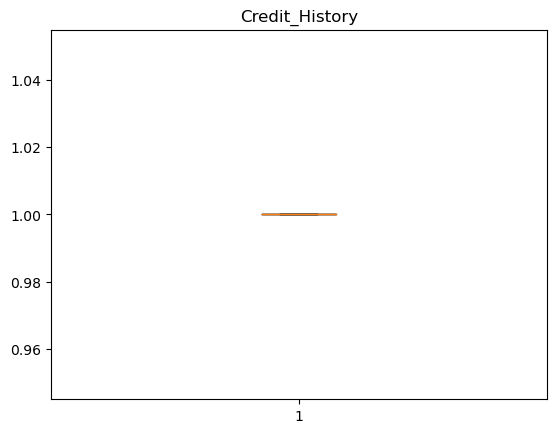

In [36]:
num_cols=['ApplicantIncome','CoapplicantIncome', "LoanAmount",'Loan_Amount_Term','Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(train[i])
    plt.title(i)

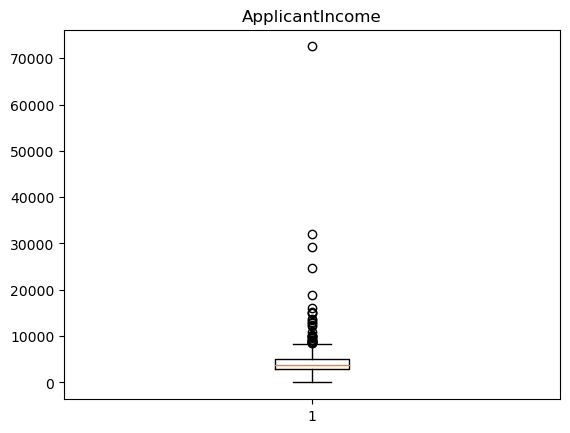

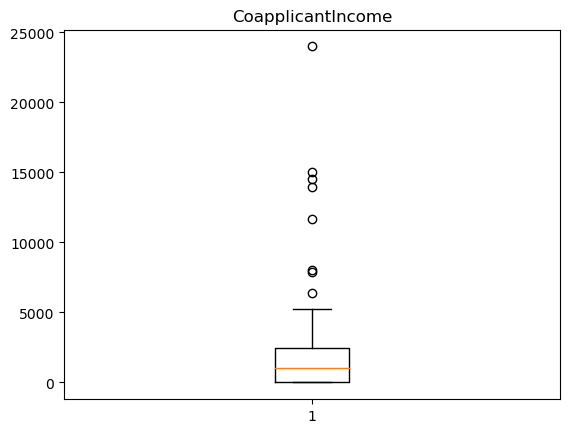

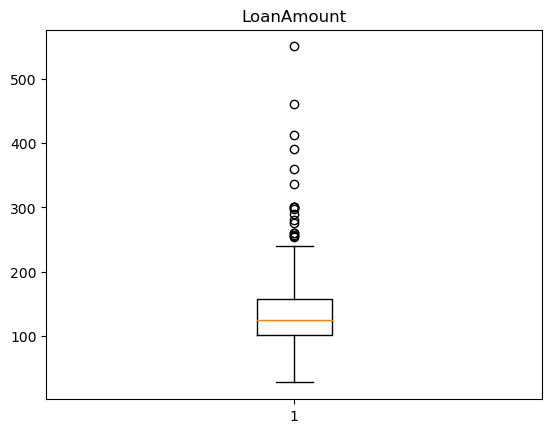

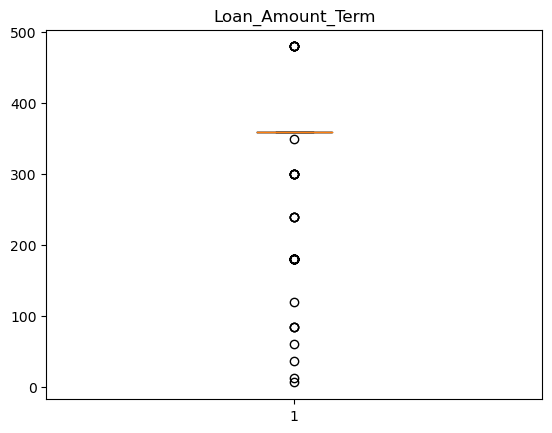

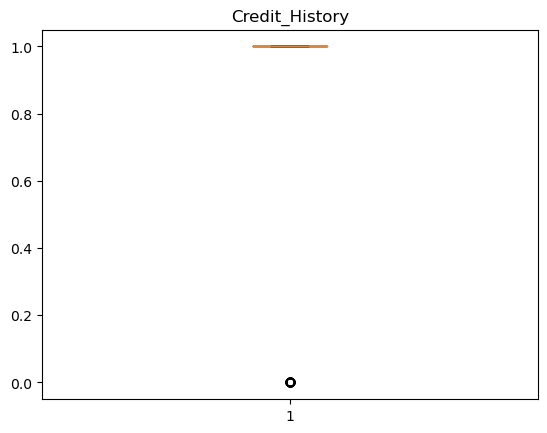

In [37]:
num_cols=['ApplicantIncome','CoapplicantIncome', "LoanAmount",'Loan_Amount_Term','Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(test[i])
    plt.title(i)

In [38]:
Q1 = test['ApplicantIncome'].quantile(0.25)
Q3 = test['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
test['ApplicantIncome']=np.where(test['ApplicantIncome']>upper_whisker,upper_whisker,np.where(test['ApplicantIncome']<lower_whisker,lower_whisker,test['ApplicantIncome']))

In [39]:
Q1 = test["LoanAmount"].quantile(0.25)
Q3 = test["LoanAmount"].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
test['LoanAmount']=np.where(test['LoanAmount']>upper_whisker,upper_whisker,np.where(test['LoanAmount']<lower_whisker,lower_whisker,test['LoanAmount']))

In [40]:
Q1 = test['Loan_Amount_Term'].quantile(0.25)
Q3 = test['Loan_Amount_Term'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
test['Loan_Amount_Term']=np.where(test['Loan_Amount_Term']>upper_whisker,upper_whisker,np.where(test['Loan_Amount_Term']<lower_whisker,lower_whisker,test['Loan_Amount_Term']))

In [41]:
Q1 = test['Credit_History'].quantile(0.25)
Q3 = test['Credit_History'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
test['Credit_History']=np.where(test['Credit_History']>upper_whisker,upper_whisker,np.where(test['Credit_History']<lower_whisker,lower_whisker,test['Credit_History']))

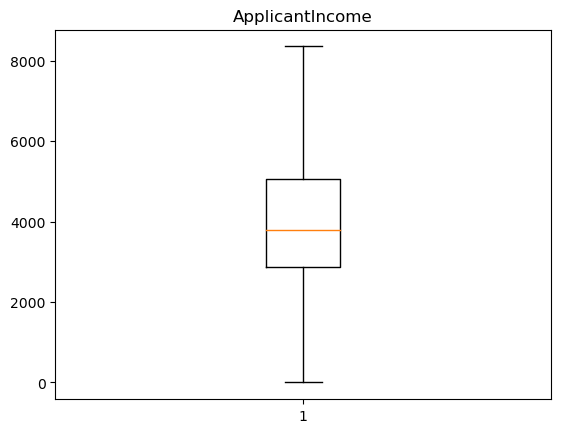

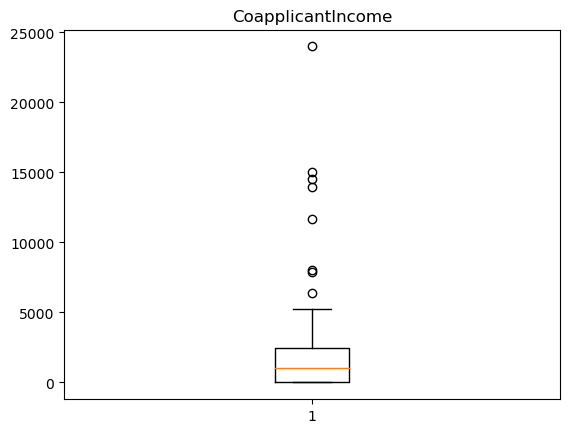

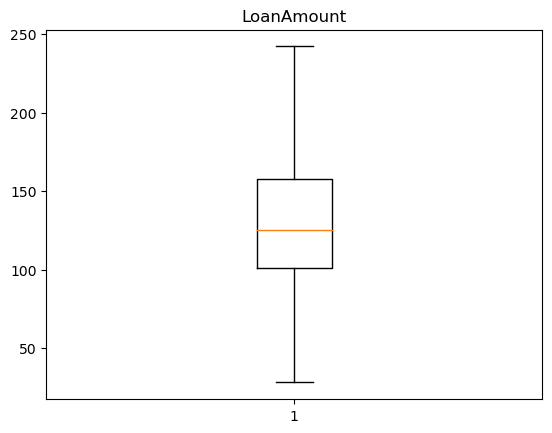

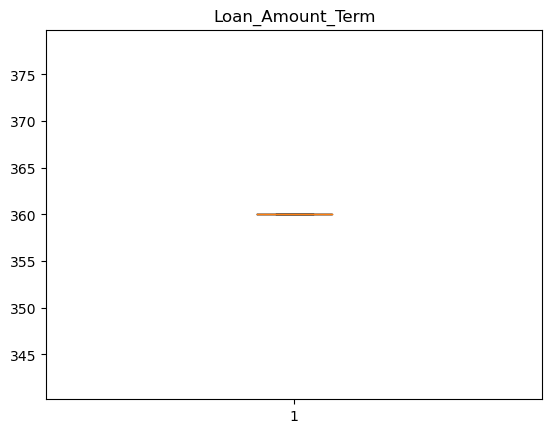

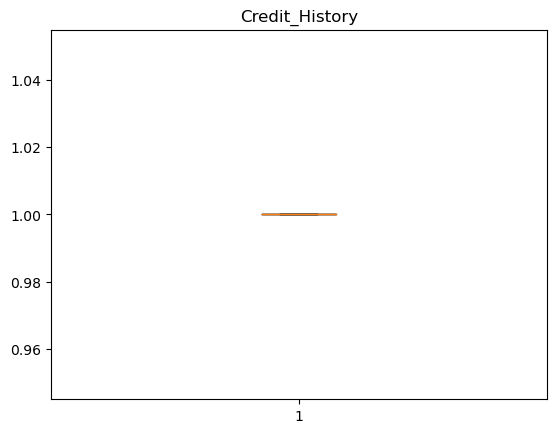

In [42]:
num_cols=['ApplicantIncome','CoapplicantIncome', "LoanAmount",'Loan_Amount_Term','Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(test[i])
    plt.title(i)

# MODEL MAKING

In [45]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [46]:
X = train.drop('Loan_Status',axis=1) 
y = train['Loan_Status']

In [47]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [49]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [50]:
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1

n1 of kfold 5
accuracy_score 0.6747967479674797
n2 of kfold 5
accuracy_score 0.6991869918699187
n3 of kfold 5
accuracy_score 0.6991869918699187
n4 of kfold 5
accuracy_score 0.6666666666666666
n5 of kfold 5
accuracy_score 0.6721311475409836


In [51]:
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]

In [52]:
submission = pd.read_csv(r"C:\Users\susha\Downloads\sample_submission_49d68Cx.csv")

In [53]:
submission['Loan_Status']= pred_test
submission['Loan_ID'] = test_original["Loan_ID"]

In [54]:
#we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [55]:
df = pd.DataFrame(submission, columns=['Loan_ID','Loan_Status'])

In [56]:
import base64

In [64]:
#write dataframe to file
df. to_csv("test1.csv")  
#read it back
pd.read_csv("test1.csv").head()

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y


In [66]:
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)